# 张量
- 0阶张量是标量
- 1阶张量是向量
- 2阶张量是矩阵
- 张量可以推广到任意维度，在深度学习中，张量是最基本的数据容器
## 张量举例
- 2D张量：结构化的数据(samples, features)
- 3D张量：单个图像(height, width, channels)
- 4D张量：多个图像(samples, height, width, channels)
- 5D张量：视频(samples, frames, height, width, channels)

In [31]:
import numpy as np

In [33]:
s = np.array(12)
s.ndim

0

In [34]:
v = np.array([1, 2, 3])
v.ndim

1

In [35]:
m = np.array([[1, 2, 3], [4, 5, 6]])
m.ndim

2

In [38]:
# 创建一个3节张量
t = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(t.shape)
print(t.ndim)

(2, 2, 3)
3


(28, 28)


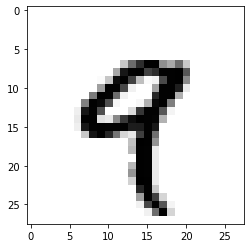

In [42]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]
print(digit.shape)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [43]:
# 选取训练数据集中的部分样本
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [44]:
# 选取训练数据集中的样本的部分像素
my_slice = train_images[10:100, 14:, 14:]
print(my_slice.shape)

(90, 14, 14)


## 张量的基本运算
- 张量能高效计算的原理在于它避免了for循环，而是使用了矩阵运算

In [50]:
# 使用最原始的for循环定义
def navie_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(0, x[i, j])
    return x

In [61]:
# 使用numpy中的矩阵运算
def navie_relu_opt(x):
    return np.maximum(0, x)

In [62]:
print(x)

[[1 2 3]
 [4 5 6]]


In [63]:
print(navie_relu(x))

[[1 2 3]
 [4 5 6]]


In [64]:
print(navie_relu_opt(x))

[[1 2 3]
 [4 5 6]]


In [65]:
# 使用for循环定义张量的加法
# 假设只在两个二阶张量上做加法
def naive_add(x, y):
    assert len(x.shape) == len(y.shape) == 2
    assert x.shape == y.shape
    # 防止篡改输入的参数
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [66]:
# 使用numpy中的矩阵运算
def naive_add_opt(x, y):
    return x + y

In [67]:
# 定义两个二阶张量
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([[7, 8, 9], [10, 11, 12]])
print(naive_add(x, y))

[[ 8 10 12]
 [14 16 18]]


In [68]:
print(naive_add_opt(x, y))

[[ 8 10 12]
 [14 16 18]]


# 张量的广播机制
- 张量的广播机制是指，当两个张量的维度不一致时，可以将维度较小的张量的维度填充到维度较大的张量中
- 被广播的张量形状要和另一个张量的后面保持一致

In [69]:
# 成功的广播举例(3,)向(2, 3)上广播
# 创建一个向量和一个矩阵
v = np.array([1, 2, 3])
m = np.array([[1, 2, 3], [4, 5, 6]])
print(v + m)

[[2 4 6]
 [5 7 9]]


In [70]:
# 失败的广播举例(2,)向(2, 3)上广播
# 创建一个向量和矩阵
v = np.array([1, 2])
m = np.array([[1, 2, 3], [4, 5, 6]])
print(v+m)

ValueError: operands could not be broadcast together with shapes (2,) (2,3) 

# 张量的点积
- 在张量的维度是2阶的时候，点积就是矩阵乘法

In [71]:
# 使用循环定义一个矩阵和一个向量的乘法
def naive_matrix_vector_mul(m, v):
    assert len(m.shape) == 2 and len(v.shape) == 1 and m.shape[1] == v.shape[0]
    # 创建一个结果
    z = np.zeros(m.shape[0])
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            z[i] += m[i, j] * v[j]
    return z

In [73]:
# 使用numpy中的矩阵运算
def naive_matrix_vector_mul_opt(m, v):
    return np.dot(m, v)

In [74]:
# 创建一个矩阵和一个向量
m = np.array([[1, 2, 3], [4, 5, 6]])
v = np.array([7, 8, 9])
print(naive_matrix_vector_mul(m, v))

[ 50. 122.]


In [75]:
# 创建一个矩阵和一个向量
m = np.array([[1, 2, 3], [4, 5, 6]])
v = np.array([7, 8, 9])
print(naive_matrix_vector_mul_opt(m, v))

[ 50 122]


In [77]:
# 将一个2x3的矩阵变形成一个向量
m = np.array([[1, 2, 3], [4, 5, 6]])
print(m.reshape(6))

[1 2 3 4 5 6]
